In [1]:
import numpy as np
from Utils.DTMC_Utils import DTMC_Utils
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

In [2]:
np.random.seed(12345)

In [3]:
reference_information_state = 1

In [4]:
def randomTarget(S):
    target_node = np.random.randint(1, S)
    target = np.zeros(3)
    target[0] = target_node - 1
    target[1] = target_node
    target[2] = target_node + 1
    return target

In [5]:
num_of_experiments = 1000
grid_dimension = 5
nodesNumber = grid_dimension * grid_dimension
grid_graph = GridGraph(grid_dimension, grid_dimension)

alpha = 1
# Z_r = [4, 5, 6]
agents_list = [3, 4, 5, 6, 7, 8] 

# Array per memorizzare i risultati
average_execution_times_all = []
std_execution_times_all = []
average_execution_times_preferred_direction_all = []
std_execution_times_preferred_direction_all = []

# Loop per ciascun valore di agent_number
for agent_number in tqdm(agents_list, desc="Processing agent counts"):
    average_execution_times = np.zeros(num_of_experiments, dtype=float)
    average_execution_times_preferred_direction = np.zeros(num_of_experiments, dtype=float)

    for i in range(num_of_experiments):
        Z_r = randomTarget(nodesNumber)
        agents = DTMC_Utils.initAgents(agent_number, nodesNumber)
        initial_positions = [a.getPosition() for a in agents]

        experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
        initial_state = experiment.getInformationStateVector()
        experiment.run()
        average_execution_times[i] = experiment.getMeanConsensusTime()

        for (j, a) in enumerate(agents):
            a.updatePosition(initial_positions[j])

        preferred_direction_experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha, _preferred_direction=True)
        preferred_direction_experiment.update_agents_information_state(initial_state[:-1])
        preferred_direction_experiment.run()
        average_execution_times_preferred_direction[i] = preferred_direction_experiment.getMeanConsensusTime()

    
    average_execution_times_all.append(np.mean(average_execution_times))
    std_execution_times_all.append(np.std(average_execution_times))
    average_execution_times_preferred_direction_all.append(np.mean(average_execution_times_preferred_direction))
    std_execution_times_preferred_direction_all.append(np.std(average_execution_times_preferred_direction))

Processing agent counts: 100%|██████████| 6/6 [01:47<00:00, 17.93s/it]


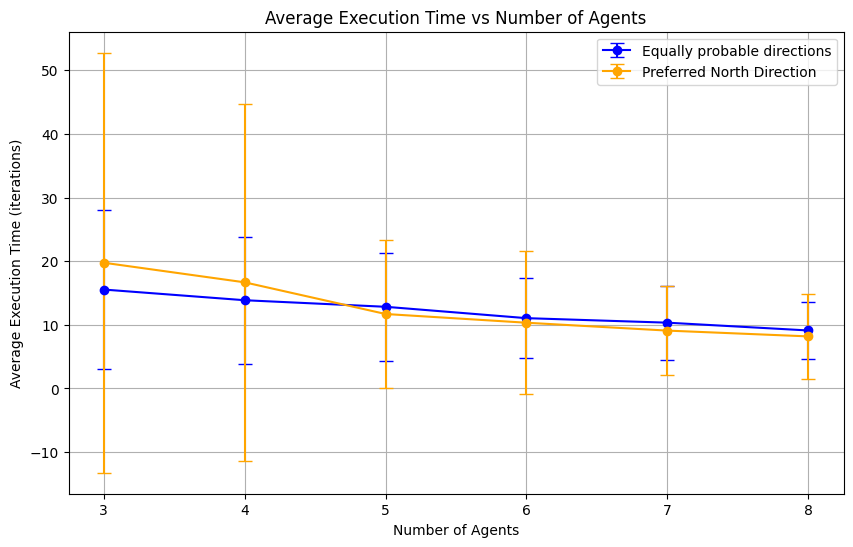

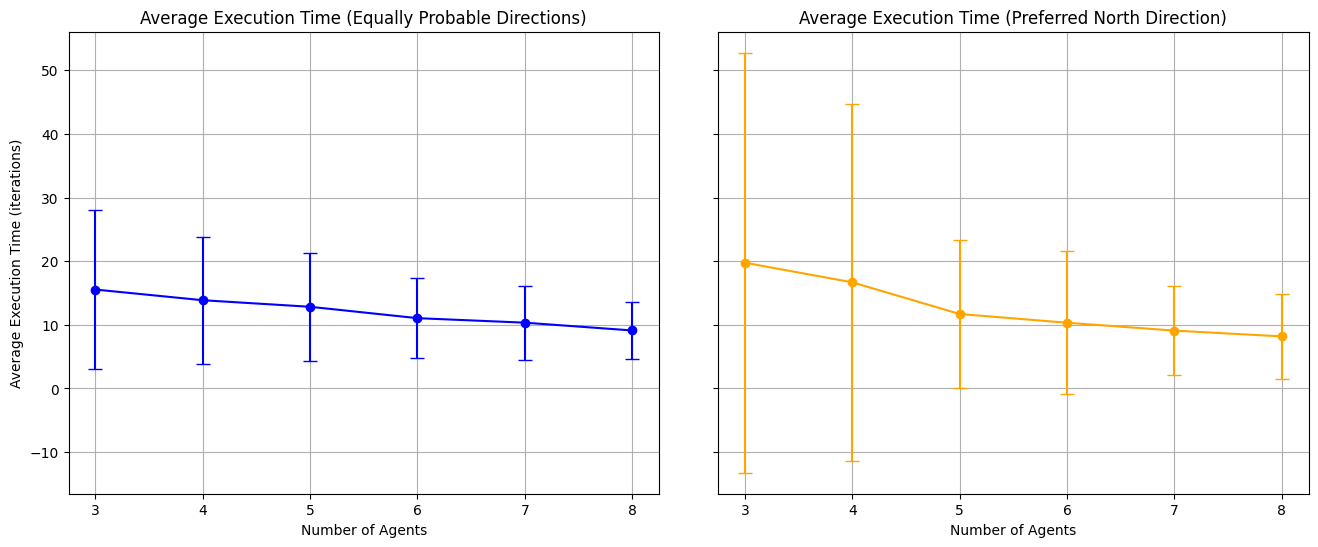

In [6]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    agents_list,
    average_execution_times_all,
    yerr=std_execution_times_all,
    fmt='-o',
    label="Equally probable directions",
    capsize=5,
    color='blue'
)
plt.errorbar(
    agents_list,
    average_execution_times_preferred_direction_all,
    yerr=std_execution_times_preferred_direction_all,
    fmt='-o',
    label="Preferred North Direction",
    capsize=5,
    color='orange'
)
plt.title("Average Execution Time vs Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Average Execution Time (iterations)")
plt.legend()
plt.grid(True)
plt.show()

# Creazione dei subplot orizzontali
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.subplots_adjust(wspace=0.1)  # Spazio tra i subplot

# Grafico senza rumore
axs[0].errorbar(
    agents_list,
    average_execution_times_all,
    yerr=std_execution_times_all,
    fmt='-o',
    capsize=5,
    color='blue'
)
axs[0].set_title("Average Execution Time (Equally Probable Directions)")
axs[0].set_xlabel("Number of Agents")
axs[0].set_ylabel("Average Execution Time (iterations)")
axs[0].grid(True)

# Grafico con rumore
axs[1].errorbar(
    agents_list,
    average_execution_times_preferred_direction_all,
    yerr=std_execution_times_preferred_direction_all,
    fmt='-o',
    capsize=5,
    color='orange'
)
axs[1].set_title("Average Execution Time (Preferred North Direction)")
axs[1].set_xlabel("Number of Agents")
axs[1].grid(True)

# Mostra i grafici
plt.show()